In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('data.csv')
data.drop('nameOrig',axis = 1,inplace = True)
data.drop('nameDest',axis = 1,inplace = True)
data.drop('isFlaggedFraud',axis = 1,inplace = True)
print(data.head())

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0  


In [3]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [4]:
data_class_0=data[data['isFraud']==0]
data_class_1=data[data['isFraud']==1]

In [5]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
data_class_0.sample(8213)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3874864,283,CASH_OUT,49911.31,598.0,0.00,3695059.57,3744970.88,0
2013834,180,CASH_OUT,145.33,12450.0,12304.67,61068.89,61214.21,0
3459019,257,PAYMENT,6375.17,485.0,0.00,0.00,0.00,0
26884,8,CASH_OUT,235912.80,0.0,0.00,8574445.33,8953314.93,0
1347379,137,PAYMENT,1690.61,0.0,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
5404790,377,PAYMENT,17702.13,116428.0,98725.87,0.00,0.00,0
2861213,227,CASH_IN,281888.54,315.0,282203.54,855733.87,573845.34,0
2108848,183,CASH_OUT,526513.32,20280.0,0.00,3741289.04,4267802.36,0
1750135,161,TRANSFER,288688.03,0.0,0.00,866494.23,1155182.26,0


In [7]:
data_class_0_under = data_class_0.sample(8213)

In [8]:
data_test_under = pd.concat([data_class_0_under,data_class_1],axis=0)

In [9]:
# Encoding categorical data, transfer type columns into numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
data_array = np.array(data_test_under)
labelencoder = LabelEncoder()
data_array[:, 1] = labelencoder.fit_transform(data_array[:, 1])

In [10]:
def feature_normalize(data):
    mu = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return (data - mu)/std

In [11]:
x=data_array[:,0:7]
y=data_array[:,7]

In [12]:
# normalize training data x
x[:,0]=feature_normalize(x[:,0])
x[:,1]=feature_normalize(x[:,1])
x[:,2]=feature_normalize(x[:,2])
x[:,3]=feature_normalize(x[:,3])
x[:,4]=feature_normalize(x[:,4])
x[:,5]=feature_normalize(x[:,5])
x[:,6]=feature_normalize(x[:,6])

In [13]:
#split the data into 0.8 for train 0.2 for test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,shuffle=True)

In [14]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32).reshape((-1,1))
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32).reshape((-1,1))

In [15]:
model = Sequential([
    layers.Input(shape=(7,)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

#训练模型
model.fit(X_train,y_train,epochs=10)

Epoch 1/10


C:\Users\shiki\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


385/385 [==============================] - 0s 506us/step - loss: 0.3260 - accuracy: 0.8625
Epoch 2/10
385/385 [==============================] - 0s 509us/step - loss: 0.1817 - accuracy: 0.9236
Epoch 3/10
385/385 [==============================] - 0s 506us/step - loss: 0.1653 - accuracy: 0.9375
Epoch 4/10
385/385 [==============================] - 0s 499us/step - loss: 0.1346 - accuracy: 0.9433
Epoch 5/10
385/385 [==============================] - 0s 500us/step - loss: 0.1201 - accuracy: 0.9539
Epoch 6/10
385/385 [==============================] - 0s 498us/step - loss: 0.1130 - accuracy: 0.9545
Epoch 7/10
385/385 [==============================] - 0s 507us/step - loss: 0.1166 - accuracy: 0.9530
Epoch 8/10
385/385 [==============================] - 0s 508us/step - loss: 0.1059 - accuracy: 0.9584
Epoch 9/10
385/385 [==============================] - 0s 506us/step - loss: 0.0998 - accuracy: 0.9598
Epoch 10/10
385/385 [==============================] - 0s 507us/step - loss: 0.0949 - accurac

In [34]:
#模型结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [16]:
# test X_test acc
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 417us/step - loss: 0.1063 - accuracy: 0.9508


[0.10626295208930969, 0.9508156776428223]

In [17]:
x_test_pred=model.predict(X_test)

In [18]:
X_test

array([[ 1.7079176e-01, -7.5432265e-01, -3.9247873e-01, ...,
        -2.0814978e-01, -1.2105679e-01, -1.9262463e-01],
       [-1.6445477e-01,  5.9960878e-01, -4.4098064e-01, ...,
        -2.0646954e-01, -2.2579722e-01, -3.1024823e-01],
       [ 3.1004801e-01, -7.5432265e-01,  8.0561578e-02, ...,
        -2.0814978e-01, -1.4549178e-01,  3.7913703e-04],
       ...,
       [-1.4848104e+00, -7.5432265e-01,  5.5851269e-01, ...,
        -2.0814978e-01, -2.2579722e-01,  1.2751490e-01],
       [-1.2269284e+00, -7.5432265e-01,  1.1494988e+00, ...,
        -2.0814978e-01, -5.8550529e-02,  5.6556952e-01],
       [-1.5518596e+00, -7.5432265e-01, -3.9612961e-01, ...,
        -2.0814978e-01, -2.2278808e-01, -3.0765274e-01]], dtype=float32)

In [19]:
y_test

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [20]:
# x_test_pred是每条记录的概率，用np.round()函数让>0.5 的值=1，<0.5的=0

In [21]:
x_test_pred

array([[2.9389676e-01],
       [1.9345935e-05],
       [9.9912822e-01],
       ...,
       [9.9998510e-01],
       [9.9999964e-01],
       [4.5832810e-01]], dtype=float32)

In [22]:
x_test_outcome = np.round(x_test_pred)

In [23]:
x_test_outcome

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [24]:
#这行代码就是实现model.evaluate()的功能，acc of X_test is same in this and next box
pred=sum(x_test_outcome==y_test)/len(x_test_outcome)
print(pred)


[0.95081568]


In [25]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 374us/step - loss: 0.1063 - accuracy: 0.9508


[0.10626295208930969, 0.9508156776428223]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred = np.round(y_pred)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2081
         1.0       0.99      0.91      0.95      2026

    accuracy                           0.95      4107
   macro avg       0.95      0.95      0.95      4107
weighted avg       0.95      0.95      0.95      4107



In [30]:
print('confusion_matrix\n',confusion_matrix(y_test, y_pred))

confusion_matrix
 [[2054   27]
 [ 175 1851]]


In [31]:
from sklearn.metrics import roc_curve, auc 
# plot ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr,tpr) 
roc_auc

0.9503241853976158

<Figure size 432x288 with 0 Axes>

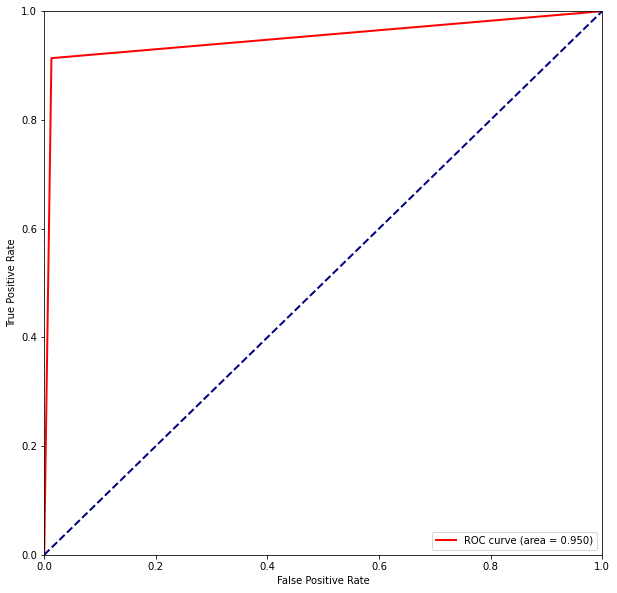

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# model.save('model')